# Amortization (workspace notebook)

We can use this notebook to work on our `amortization` application. Since this is located on `src/classworks` we can import directly the `amortization` module.

We use the `settings` module to save the applications configuration. In this case, we can get the `AMORTIZATION_TABLE_DIRPATH` that represents the "location" of the `TABLE` directory in the filesystem.

Let's create the folder if not exists. We can add this logic into the `setup` command:

In [13]:
import os
from amortization.settings import AMORTIZATION_TABLE_DIRPATH

In [14]:
AMORTIZATION_TABLE_DIRPATH

'/home/rhdzmota/Documents/Github/CREDIT-RISK-2021A/src/classwork/amortization/tables'

In [15]:
# Create the folder if not exists
if not os.path.exists(AMORTIZATION_TABLE_DIRPATH):
    os.makedirs(AMORTIZATION_TABLE_DIRPATH)

Import the `Amortization` class and create two instances.

In [16]:
import pandas as pd
from fintools import Amortization

pd.options.display.float_format = '${:,.2f}'.format

# Create a couple Amortization instances
amortization_a = Amortization(amount=50000, rate=0.08, n=8)
amortization_b = Amortization(amount=18000, rate=0.34/12, n=6)

In [17]:
# We should be able to get a dataframe
df = amortization_b.get_table()
df

,t,balance,principal,interest,annuity
0,0,"$18,000.00",NaN,NaN,NaN
1,1,"$15,205.58","$2,794.42",$510.00,"$3,304.42"
2,2,"$12,331.98","$2,873.60",$430.82,"$3,304.42"
3,3,"$9,376.96","$2,955.02",$349.41,"$3,304.42"
4,4,"$6,338.22","$3,038.74",$265.68,"$3,304.42"
5,5,"$3,213.38","$3,124.84",$179.58,"$3,304.42"
6,6,$-0.00,"$3,213.38",$91.05,"$3,304.42"


We should be able to get other implementations we already have on fintools:

In [18]:
from fintools.rates import Cetes28

cetes28 = Cetes28()

In [19]:
cetes28.get_dataframe().iloc[-1].value

4.07

Let's create a quick visualization:

In [21]:
import matplotlib.pyplot as plt

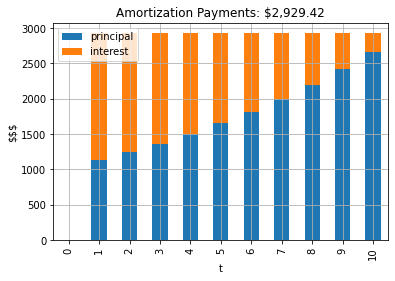

In [22]:
a = Amortization(amount=18000, rate=0.10, n=10)
df = a.get_table()

plot = df.plot.bar(x="t", y=["principal", "interest"], stacked=True)
plt.title("Amortization Payments: ${:,.2f}".format(a.annuity))
plt.ylabel("$$$")
plt.grid()
plt.show()

In [23]:
df.annuity[1:].unique().tolist().pop()

2929.4171078852073

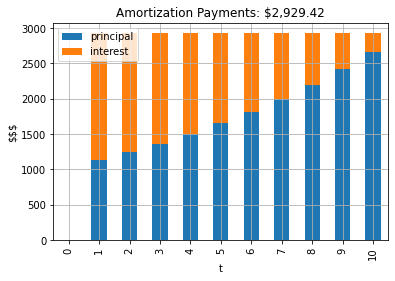

In [24]:
plot.get_figure()